# Global Ocean mean Temperature (Thetao)

In [14]:
from aqua import Reader,catalogue, inspect_catalogue
import datetime
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from aqua import Reader
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
data = reader.retrieve()

data=data.rename({"nz1":"lev"})
data=data.rename({"ocpt":"thetao"})
ds2=data.drop(["ci","sithick","siue","sivn","so","sos","sst","zos"])
ds3=data.drop(["ci","thetao","sithick","siue","sivn","sos","sst","zos"])



/home/b/b382397/.conda/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/b/b382397/.conda/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [3]:
#ds2.lat*2*math.pi/360
weights=np.cos(np.deg2rad(ds2.lat)) # Weights are proportional to the grid cell area, which is influenced by the latd

In [4]:
t3d=ds2.thetao.resample(time="Y").mean()
t3dw=t3d.weighted(weights)


In [7]:
#tt=masked_average(ds2['thetao'], dim=['i','j'], weights=acello)
tg=t3d.mean(("lat","lon"))
tgw=t3dw.mean(("lat","lon"))
# To double check that weighted and unweighted averages are different
# tg[:,0].plot.line()
# tgw[:,0].plot.line()

In [8]:
# We identify the levels that represent each selected ocean detph
levs=t3d.lev
ilev0=0

for ilev in range(len(levs)):
 tlev = levs[ilev]
 #print(tlev.values)
# if tlev <= 1000: print(ilev)
# if tlev<= 500: print(ilev)
 if tlev<= 500: ilev500=ilev
 if tlev<= 1000: ilev1000=ilev
 if tlev<= 2000: ilev2000=ilev
 if tlev<= 3000: ilev3000=ilev
 if tlev<= 4000: ilev4000=ilev
 if tlev<= 5000: ilev5000=ilev
print(ilev0,ilev500,ilev1000,ilev2000,ilev3000,ilev4000,ilev5000)

0 39 46 51 55 59 63


(5500.0, 0.0)

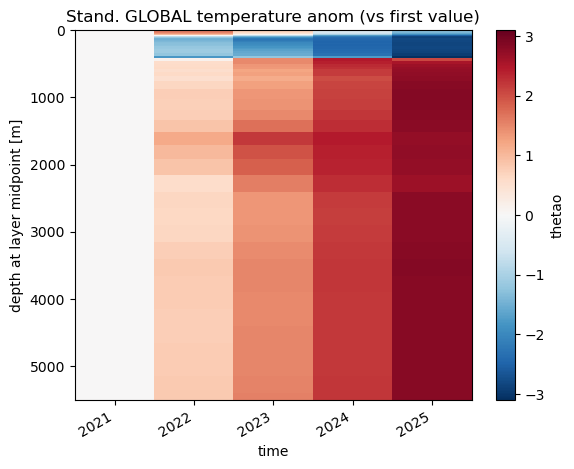

In [9]:
# To compute the temporal anomalies with respect to the initial value
#tga=tg-tg.mean("time")
tga=tg-tg[0,]
# Now standardised with respect to the temporal STD at each respective depth
tgs=tga/tga.std("time")
# And we perform the corresponding hovmoller plot
tgst=tgs.transpose()
tgst.plot()

plt.title("Stand. GLOBAL temperature anom (vs first value)")
plt.ylim((5500,0))

(5500.0, 0.0)

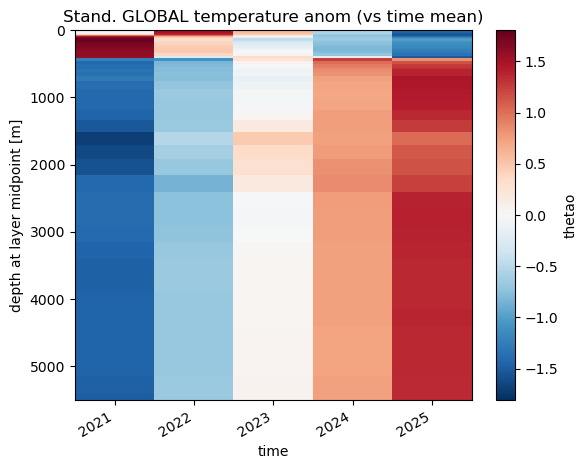

In [10]:
# Now the same but for the anomaly with respet to the temporal mean
tga2=tg-tg.mean("time")
# Now standardised with respect to the temporal STD at each respective depth
tgs2=tga2/tga2.std("time")
# And we perform the corresponding hovmoller plot
tgs2t=tgs2.transpose()
tgs2t.plot()

plt.title("Stand. GLOBAL temperature anom (vs time mean)")
plt.ylim((5500,0))

(5500.0, 0.0)

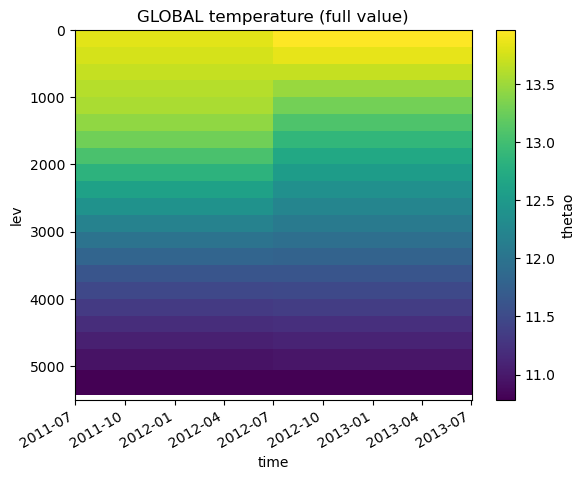

In [17]:
# And now for the absolute temperature values
tgt=tg.transpose()
tgt.plot()

plt.title("GLOBAL temperature (full value)")
plt.ylim((5500,0))

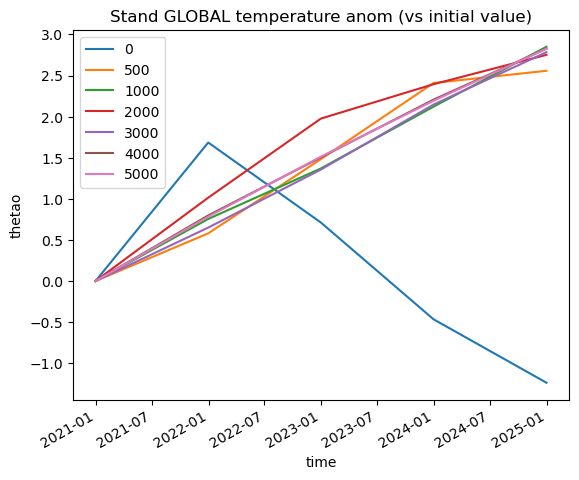

In [11]:
# We now extract and plot the timeseries for the standardise global anomalies at different levels
tga0=tgs[:,ilev0]
tga500=tgs[:,ilev500]
tga1000=tgs[:,ilev1000]
tga2000=tgs[:,ilev2000]
tga3000=tgs[:,ilev3000]
tga4000=tgs[:,ilev4000]
tga5000=tgs[:,ilev5000]
tga0.plot.line()
tga500.plot.line()
tga1000.plot.line()
tga2000.plot.line()
tga3000.plot.line()
tga4000.plot.line()
tga5000.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("Stand GLOBAL temperature anom (vs initial value)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')

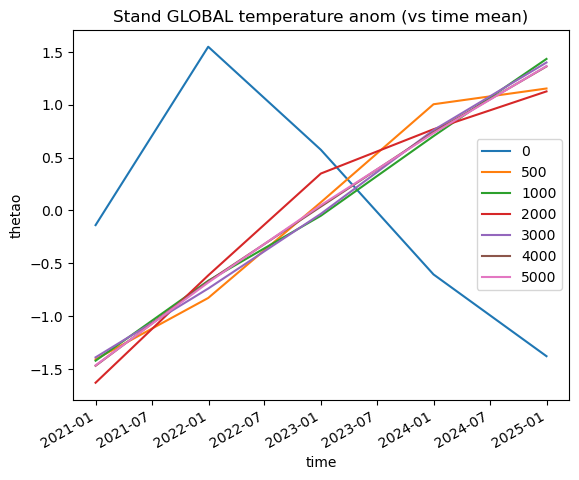

In [12]:
# We now extract and plot the timeseries for the standardise global anomalies at different levels
tga0b=tgs2[:,ilev0]
tga500b=tgs2[:,ilev500]
tga1000b=tgs2[:,ilev1000]
tga2000b=tgs2[:,ilev2000]
tga3000b=tgs2[:,ilev3000]
tga4000b=tgs2[:,ilev4000]
tga5000b=tgs2[:,ilev5000]
tga0b.plot.line()
tga500b.plot.line()
tga1000b.plot.line()
tga2000b.plot.line()
tga3000b.plot.line()
tga4000b.plot.line()
tga5000b.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("Stand GLOBAL temperature anom (vs time mean)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')


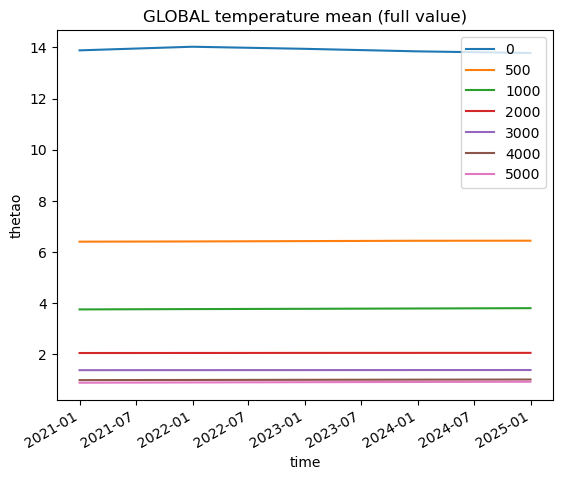

In [13]:
# And we plot the absolute temperature mean values
tg0=tg[:,ilev0]
tg500=tg[:,ilev500]
tg1000=tg[:,ilev1000]
tg2000=tg[:,ilev2000]
tg3000=tg[:,ilev3000]
tg4000=tg[:,ilev4000]
tg5000=tg[:,ilev5000]
tg0.plot.line()
tg500.plot.line()
tg1000.plot.line()
tg2000.plot.line()
tg3000.plot.line()
tg4000.plot.line()
tg5000.plot.line()

#t0.plot.line(color="blue",linestyle="dotted")
plt.title("GLOBAL temperature mean (full value)")
plt.legend(["0","500","1000","2000","3000","4000","5000"], loc='best')